In [45]:
# Paquetes a ser utilizados
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inLine


In [46]:
# La definición de un modelo determinístico de un cálculo de costos: presupuesto simple con ítems, suma uno a uno.

# Variables del presupuesto simple
costo_1 = 0
costo_2 = 0
costo_3 = 0
costo_4 = 0
costo_5 = 0
costo_referencia = 500


In [47]:
# Definición de distribuciones de probabilidad a las variables del modelo
def roll_dice():
    costo_1 = np.random.triangular(50,100,200)
    costo_2 = np.random.triangular(50,100,200)
    costo_3 = np.random.triangular(50,100,200)
    costo_4 = np.random.triangular(50,100,200)
    costo_5 = np.random.triangular(50,100,200)

    return costo_1, costo_2, costo_3, costo_4, costo_5

In [48]:
# Inputs
num_simulations = 5000
max_num_rolls = 1000

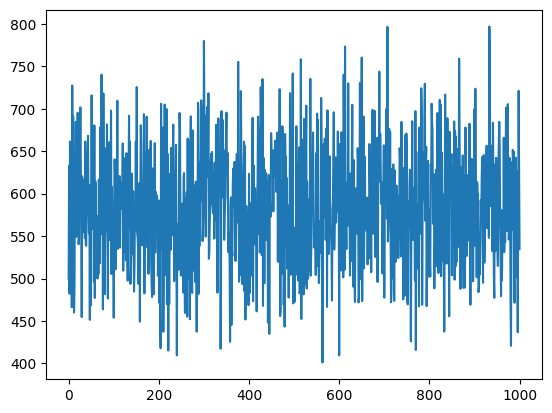

In [49]:
# Ejecución de simulación aplicada al modelo con 5000 iteraciones
for i in range(num_simulations):
    balance = [500]
    num_rolls = [0]

    while num_rolls[-1] < max_num_rolls:
        iter = roll_dice()
        # Obtiene el costo total
        costo_total = iter[0] + iter[1] + iter[2] + iter[3] + iter[4]
        balance.append(costo_total)
        num_rolls.append(num_rolls[-1] + 1)
plt.plot(num_rolls, balance)

In [50]:
# Imprime la media
np.mean(balance)

583.8569961524186

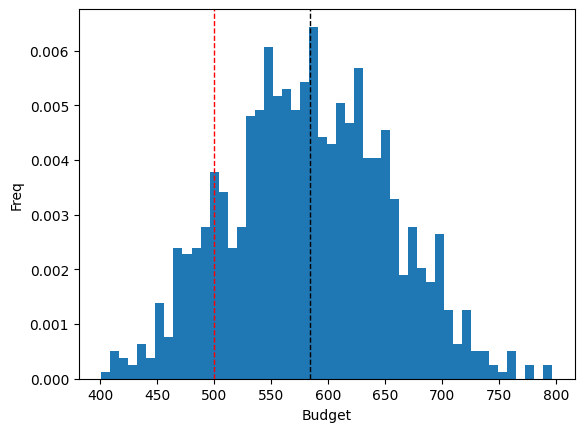

In [51]:
# Lectura e interpretación de resultados
# Visualización básica y conclusions
# Genera histograma del balance
np.random.seed(42)
plt.hist(balance, density=True, bins=50)
plt.ylabel("Freq")
plt.xlabel("Budget")
plt.axvline(np.mean(balance), color="k", linestyle="dashed", linewidth=1)
plt.axvline(costo_referencia, color="r", linestyle="dashed", linewidth=1)

In [52]:
# Numero de muestras
print("Numero de muestras: ", balance.__len__())
total_muestras = balance.__len__()

Numero de muestras:  1001


Como podemos observar gracias a la simulación, obtenemos el balance que es 583.85 
dólares, lo cual se aleja un poco de nuestra estimación inicial de 500 dólares.

In [53]:
# Genera una lista con las muestras menores al costo de referencia en costo_ok
costo_ok = [x for x in balance if x < costo_referencia]

In [54]:
num_costo_ok = costo_ok.__len__()
prob_costo_ref = num_costo_ok / total_muestras
print(f"La probabilidad de que el costo sea menor al costo de referencia es: {prob_costo_ref*100:.2f} %")

La probabilidad de que el costo sea menor al costo de referencia es: 12.69 %


Con esto podemos verificar que hay una baja probabilidad del 12.69% que se ocupe menos 
de la estimación inicial (500 dólares), en otras palabras, 87.1% de probabilidad de que se use 
más de esa estimación. Osea que es un riesgo seguro para ese gasto.


In [55]:
# Otro ejemplo con diferentes distribuciones
def roll_dice():
    costo_1 = np.random.normal(100,20)
    costo_2 = np.random.triangular(50,100,200)
    costo_3 = np.random.triangular(50,100,200)
    costo_4 = np.random.triangular(50,100,200)
    costo_5 = np.random.normal(100,20)

    return costo_1, costo_2, costo_3, costo_4, costo_5

In [56]:
# Inputs
num_simulations = 5000
max_num_rolls = 1000

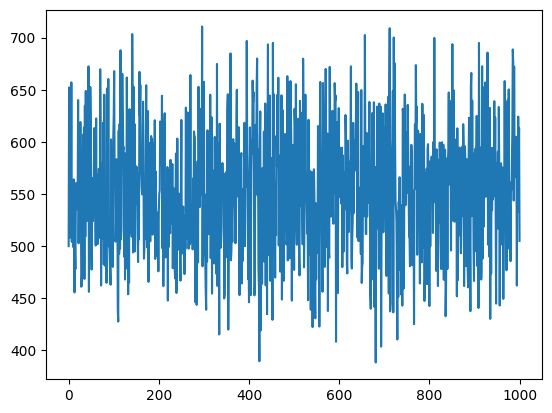

In [57]:
# Ejecución de simulación aplicada al modelo con 5000 iteraciones
for i in range(num_simulations):
    balance2 = [500]
    num_rolls = [0]

    while num_rolls[-1] < max_num_rolls:
        iter = roll_dice()
        # Obtiene el costo total
        costo_total = iter[0] + iter[1] + iter[2] + iter[3] + iter[4]
        balance2.append(costo_total)
        num_rolls.append(num_rolls[-1] + 1)
plt.plot(num_rolls, balance2)

In [58]:
# Imprime la media
np.mean(balance2)

552.1789776142836

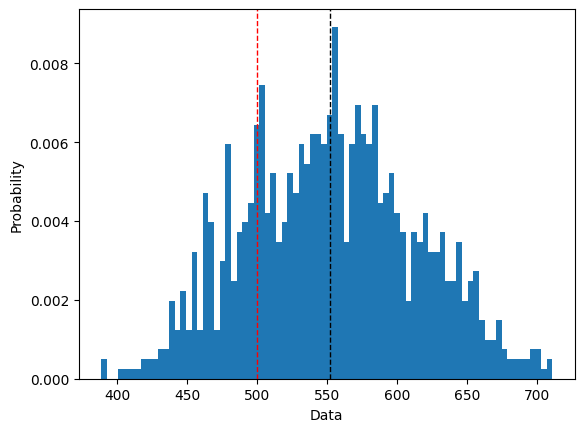

In [59]:
# Genera histograma del Balance
np.random.seed(42)
plt.hist(balance2, density=True, bins=80)
plt.ylabel("Probability")
plt.xlabel("Data")
plt.axvline(np.mean(balance2), color="k", linestyle="dashed", linewidth=1)
plt.axvline(costo_referencia, color="r", linestyle="dashed", linewidth=1)


In [60]:
total_muestras = balance2.__len__()
# Genera una lista con las muestras menores al costo de referencia en costo_ok
costo_ok =[x for x in balance2 if x<costo_referencia]

# Probabilidad de que sea un total menor al costo de referencia
num_costo_ok = costo_ok.__len__()
prob_costo_ref = num_costo_ok / total_muestras
print(f"La probabilidad de que el costo sea menor al costo de referencia es: {prob_costo_ref*100:.2f} %")

La probabilidad de que el costo sea menor al costo de referencia es: 21.98 %


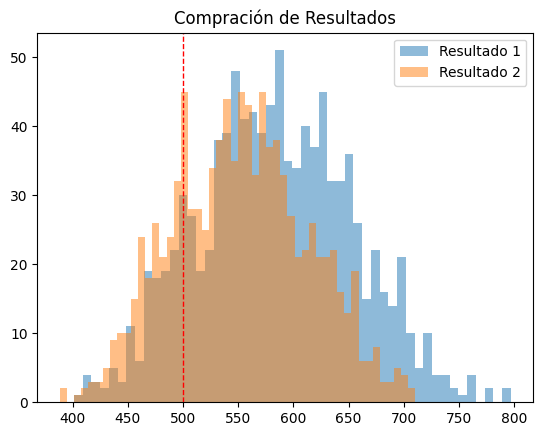

In [61]:
# Análisis de sensibilidad con dos tipos de distribución diferentes
import numpy

bins = numpy.linspace(0,2000,10)

plt.hist(balance, bins=50, alpha=0.5, label="Resultado 1")
plt.hist(balance2, bins=50, alpha=0.5, label="Resultado 2")
plt.legend(loc="upper right")
plt.title("Compración de Resultados")
plt.axvline(costo_referencia, color="r", linestyle="dashed", linewidth=1)
plt.show()

#### Conclusiones finales
* Como podemos observar en la comparación de ambos histogramas, notamos que el del 
resultado 2 que tuvo otras diferentes de distribución de probabilidad incluidas en los 
costos(distribución normal), tiene un rango mucho menor que la del primer resultado. 
Entones el resultado 2 también como observamos tiene mejor probabilidad de que el costo 
sea menor a la estimación inicial (21.98%) a diferencia del primer resultado (12.69%) 
entonces ya podríamos ir definiendo en base a los datos cual nos da mejores resultados.